# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [30]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 之前做過的處理

In [6]:
# 讀取資料檔
f_app_train = 'application_train.csv'
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [20]:
null = {}
for col in app_train.columns:
    null[col] = app_train[col].isnull().sum()

null = pd.DataFrame(null, index=['null_num']).T
null = null.sort_values(by='null_num', ascending=True)
null[null['null_num'] == 0]

,null_num
SK_ID_CURR,0
REG_REGION_NOT_LIVE_REGION,0
REG_REGION_NOT_WORK_REGION,0
LIVE_REGION_NOT_WORK_REGION,0
REG_CITY_NOT_LIVE_CITY,0
REG_CITY_NOT_WORK_CITY,0
LIVE_CITY_NOT_WORK_CITY,0
ORGANIZATION_TYPE,0
DAYS_EMPLOYED_ANOM,0
FLAG_DOCUMENT_2,0


## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

[作業目標]
使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
觀察上述離散化特徵, 對於目標值的預測有沒有幫助
[作業重點]
仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [10]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['YEARS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

In [22]:
grp = range(20, 80, 10)
app_train['AGE_GROUP_10'] = pd.cut(app_train['YEARS_BIRTH'], bins=grp)
app_train['AGE_GROUP_10'].value_counts()

(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: AGE_GROUP_10, dtype: int64

In [23]:
app_train['AGE_GROUP_bin5'] = pd.cut(app_train['YEARS_BIRTH'], bins=5)
app_train['AGE_GROUP_bin5'].value_counts()

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: AGE_GROUP_bin5, dtype: int64

In [25]:
app_train['AGE_GROUP_q5'] = pd.qcut(app_train['YEARS_BIRTH'], 5)
app_train['AGE_GROUP_q5'].value_counts()

(20.517, 32.038]    61512
(39.496, 47.178]    61509
(32.038, 39.496]    61504
(56.093, 69.121]    61495
(47.178, 56.093]    61491
Name: AGE_GROUP_q5, dtype: int64

In [27]:
ages = app_train[['TARGET', 'YEARS_BIRTH', 'AGE_GROUP_10', 'AGE_GROUP_bin5', 'AGE_GROUP_q5']]
ages.head(5)

,TARGET,YEARS_BIRTH,AGE_GROUP_10,AGE_GROUP_bin5,AGE_GROUP_q5
0,1,25.920548,"(20, 30]","(20.469, 30.238]","(20.517, 32.038]"
1,0,45.931507,"(40, 50]","(39.959, 49.679]","(39.496, 47.178]"
2,0,52.180822,"(50, 60]","(49.679, 59.4]","(47.178, 56.093]"
3,0,52.068493,"(50, 60]","(49.679, 59.4]","(47.178, 56.093]"
4,0,54.608219,"(50, 60]","(49.679, 59.4]","(47.178, 56.093]"


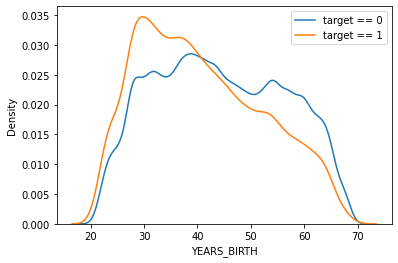

In [44]:
sns.kdeplot(ages.loc[ages['TARGET'] == 0, 'YEARS_BIRTH'], label='target == 0')
sns.kdeplot(ages.loc[ages['TARGET'] == 1, 'YEARS_BIRTH'], label='target == 1')
plt.legend()

In [48]:
ages.groupby('AGE_GROUP_10').mean()

,TARGET,YEARS_BIRTH
AGE_GROUP_10,,
"(20, 30]",0.114569,26.622041
"(30, 40]",0.095835,35.123197
"(40, 50]",0.076508,44.756079
"(50, 60]",0.061297,54.976575
"(60, 70]",0.049214,63.355933


Text(0.5, 1.0, 'AGE_GROUP_10')

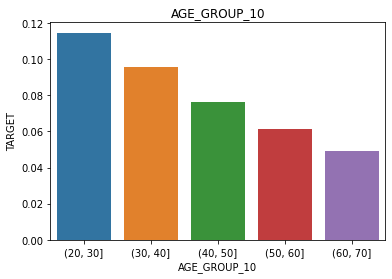

In [55]:
age_group = ages.groupby('AGE_GROUP_10').mean()
sns.barplot(x=age_group.index, y=age_group['TARGET'])
plt.title('AGE_GROUP_10')